In [56]:
import pandas as pd
from collections import OrderedDict
from __future__ import division
import missingno as msno




In [33]:
data = pd.read_csv("loan.csv")

In [37]:
#Drop empty title/desc rows
data = data.dropna(axis=0, subset=['title', 'desc'])

In [57]:
def visualize_nulls(data, save_name = "missing_values", cut_off = 0.8):
    columns = {}
    for column in  data.columns.tolist():
        columns [column] = data[column].isnull().sum()
    columns =  OrderedDict(sorted(columns.items(), key=lambda(k,v):(v,k)))
    missing_plot = msno.bar(data[columns.keys()], fontsize = 8 )
    missing_plot.set_title("Visualizaton of Missing Data", y=1.09, fontsize = 15)
    missing_plot.plot([-10, 102], [0.50, 0.50], 'k-', lw=2, color = 'r')
    missing_plot.set_xlabel("Column Name", fontsize = 15)
    missing_plot.figure.savefig("missing_values", bbox_inches = "tight")
    missing_plot.figure.show()
    columns_to_drop = []
    for value, key in columns.items():
        percentage =  ((data.shape[0] - key) / data.shape[0])
        print value, percentage
        if (percentage < 0.50):
            columns_to_drop.append(value)
    return columns_to_drop

In [58]:
data.shape

(126056, 145)

addr_state 1.0
application_type 1.0
collection_recovery_fee 1.0
debt_settlement_flag 1.0
desc 1.0
disbursement_method 1.0
dti 1.0
funded_amnt 1.0
funded_amnt_inv 1.0
grade 1.0
hardship_flag 1.0
home_ownership 1.0
initial_list_status 1.0
installment 1.0
int_rate 1.0
issue_d 1.0
last_pymnt_amnt 1.0
loan_amnt 1.0
loan_status 1.0
out_prncp 1.0
out_prncp_inv 1.0
policy_code 1.0
purpose 1.0
pymnt_plan 1.0
recoveries 1.0
revol_bal 1.0
sub_grade 1.0
term 1.0
title 1.0
total_pymnt 1.0
total_pymnt_inv 1.0
total_rec_int 1.0
total_rec_late_fee 1.0
total_rec_prncp 1.0
verification_status 1.0
zip_code 1.0
annual_inc 0.9999682680713333
last_credit_pull_d 0.9999286031605001
acc_now_delinq 0.9997778764993336
delinq_2yrs 0.9997778764993336
delinq_amnt 0.9997778764993336
earliest_cr_line 0.9997778764993336
inq_last_6mths 0.9997778764993336
open_acc 0.9997778764993336
pub_rec 0.9997778764993336
total_acc 0.9997778764993336
tax_liens 0.9992780986228343
last_pymnt_d 0.999008377229168
revol_util 0.9989766453

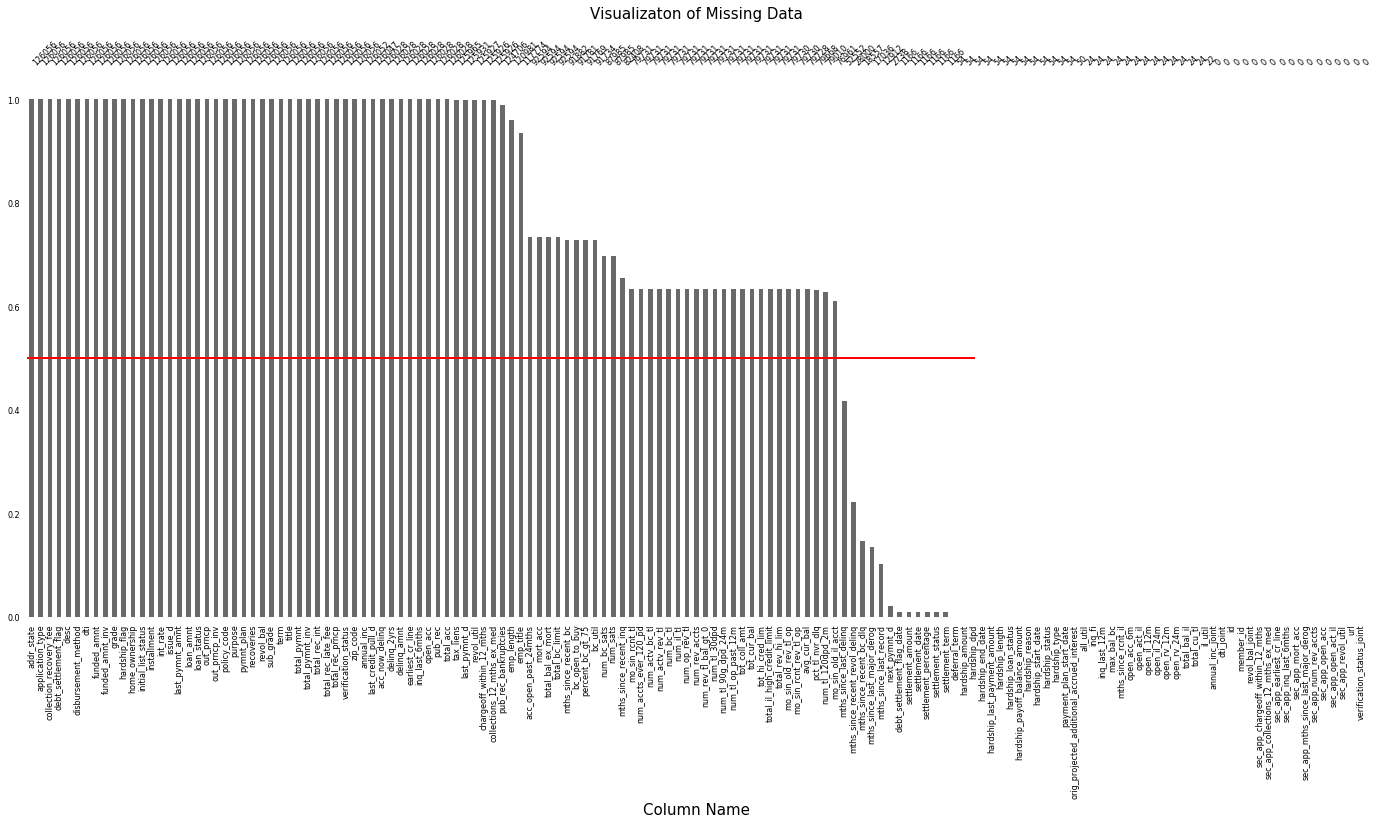

In [59]:
columns_to_drop = visualize_nulls(data)

In [60]:
columns_to_drop

['mths_since_last_delinq',
 'mths_since_recent_revol_delinq',
 'mths_since_recent_bc_dlq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'next_pymnt_d',
 'debt_settlement_flag_date',
 'settlement_amount',
 'settlement_date',
 'settlement_percentage',
 'settlement_status',
 'settlement_term',
 'deferral_term',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'payment_plan_start_date',
 'orig_projected_additional_accrued_interest',
 'all_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'mths_since_rcnt_il',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'total_bal_il',
 'total_cu_tl',
 'il_util',
 'annual_inc_joint',
 'dti_joint',
 'id',
 'member_id',
 'revol_bal_joint',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_col

In [61]:
data_dropped_cutoff = data.drop(columns_to_drop, axis='columns')

In [62]:
data_dropped_cutoff.shape

(126056, 88)

In [63]:
data.shape, data_dropped_cutoff.shape

((126056, 145), (126056, 88))

In [72]:
df = data_dropped_cutoff.dropna()

In [65]:
df.shape

(63229, 88)

In [66]:
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
desc                          0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
                             ..
mo_sin_r

In [67]:
CATEGORICAL = ['term',  'home_ownership', 'verification_status', 'purpose', 
              'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'application_type',
              'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'debt_settlement_flag']
NUMERIC = ['loan_amnt', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
              'pub_rec', 'revol_bal', 'revol_util', 'total_acc','acc_open_past_24mths'
              'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 
              'delinq_amnt', 'mo_sin_old_rev_tl_op','mort_acc', 'mths_since_recent_bc' ,
          'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 
          'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 
          'num_sats', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
          'total_bal_ex_mort','total_il_high_credit_limit',  ]
LABEL = ['grade']

In [69]:
def encode_categorical(frame, categorical_cols):
    for col in categorical_cols:
        frame = frame.merge(pd.get_dummies(frame[col]), left_index=True, right_index=True)
        frame.drop(col, axis=1, inplace=True)
    return frame

In [70]:
def split_data(data, continuous_cols, categorical_cols, label_col, test_size=0.2, row_limit=None):
        
        x_df = data.loc[:, continuous_cols + categorical_cols]

        x_df = encode_categorical(x_df, categorical_cols)

        for col in continuous_cols:
            x_df[col] = (x_df[col] - x_df[col].mean()) / x_df[col].std()

        # Specify the target labels and flatten the array
        y = pd.get_dummies(data[label_col])

        x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size=test_size, random_state=23)
        print("x_train contains {} rows and {} features".format(x_train.shape[0], x_train.shape[1]))
        return x_train, x_test, y_train, y_test

In [ ]:
 x_df = data.loc[:, NUMERIC + CATEGORICAL]

In [ ]:
 x_df = encode_categorical(x_df,  CATEGORICAL)

In [73]:
x_train, x_test, y_train, y_test = split_data(df, NUMERIC, CATEGORICAL, LABEL)

/Users/battogtokhb/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/battogtokhb/miniconda2/lib/python2.7/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


KeyboardInterrupt: 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint


def create_model(input_dim, output_dim):
    # create model
    model = Sequential()
    # input layer
    model.add(Dense(100, input_dim=input_dim, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    
    # hidden layer
    model.add(Dense(60, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    
    # output layer
    model.add(Dense(output_dim, activation='softmax'))


    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model